# Student FULL name: Tassara Jedsameanmai
# Student number: 48188964

Acknowledgement Statement by students: <br>
Please keep one acknowledgment from the following<br>
	I acknowledge that I have only used GenAI (e.g., ChatGPT) in drafting and proofreading this assignment, which is permitted in the assignment instructions. <br>



#  Answer to Section 1 (-2 if not provided) (answer in one cell): 

Koalas are iconic Australian marsupials facing threats from habitat loss and climate change. 
This analysis examines physical and biological traits such as head length, paw size, and body 
measurements to identify patterns that may inform conservation. The aim is to uncover insights
that support habitat protection and the long-term survival of the species.

# Answer to Section 2: EDA (12 Marks) - add as many cell as needed

## Step 1: Loading the Dataset

I started by loading the koala dataset and reviewing the first few rows to get an initial sense of its structure. The dataset includes both numerical attributes such as body length and head measurements and categorical data like gender and habitat. Right away, I noticed some missing values that would need to be addressed before analysis.

In [77]:
# Load and inspect the data
import pandas as pd

# Load the dataset
df = pd.read_excel("koalas_dataset.xlsx")

# Display the first 5 rows to see what data do we have
df.head()


,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,NaN,VIC,f,6.0,19.0,83.5,NaN,NaN,NaN,NaN,NaN,NaN,61.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0
2,3,1.0,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1.0,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1.0,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0


## Step 2: Checking for Missing Values

To assess data completeness, I calculated the total number of missing entries per column. Several key features including head_length, foot_length, and ear_size had missing values. Since these variables are central to our analysis, I flagged this as a priority for cleaning.


In [78]:
# Count missing values across all columns
df.isnull().sum() 

koala_id                0
region                  2
habitat                 7
gender                  9
age_in_years           10
Paw Size               11
total_length           10
head_length            13
ear_size               12
foot_length            15
skull_width            11
eye_diameter           10
chest_circumference     6
belly_circumference     6
dtype: int64

## Step 3: Cleaning the Data

### 3.1 Remove rows with too many missing values

Rather than impute too much missing data (which can introduce bias), 
I dropped rows that were missing more than half of their columns. 
This left me with a cleaner subset of 162 rows, where most features were still usable.

In [79]:
# Drop rows with 7 or more missing values
df = df.dropna(thresh=7)

print(f"Remaining rows: {df.shape[0]}")


Remaining rows: 162


### 3.2 Fix inconsistent text entries

The categorical columns 'gender' and 'habitat' contained inconsistent text formats (e.g., different cases and naming conventions). To ensure consistency and avoid potential issues during operations like grouping, filtering, or analysis, I standardized the entries. For the 'gender' column, all values were converted to lowercase single-letter labels ('f' and 'm'). For the 'habitat' column, inconsistent entries were replaced with standardized region codes (e.g., 'VIC', 'QLD').

In [80]:
# Fix inconsistent entries in the 'gender' column
df['gender'] = df['gender'].replace({
    'female': 'f',
    'male': 'm',
    'FEMALE': 'f',
    'MALE': 'm',
    'F': 'f',
    'M': 'm'
})

# Fix inconsistent entries in the 'habitat' column
df['habitat'] = df['habitat'].replace({
    'VICTORIA': 'VIC',
    'Vic': 'VIC',
    'Victoria': 'VIC',
    'VICtoria' : 'VIC',
    'QLD': 'QLD',
    'qld': 'QLD',
    'Queensland': 'QLD',
    'q': 'QLD',
    'Queenstown': 'QLD'  
})

# Confirm unique values after standardization
print("Unique gender values after standardization:", df['gender'].unique())
print("Unique habitat values after standardization:", df['habitat'].unique())

Unique gender values after standardization: ['f' 'm' nan]
Unique habitat values after standardization: ['VIC' nan 'QLD']


## Step 4: Data Type Conversion

I used .astype('category') to convert the gender and habitat columns to categorical data types. This reduces memory usage and improves the efficiency of operations like grouping or filtering. It also helps pandas recognize these columns as containing repeated categories rather than arbitrary strings.

### 4.1 Check Data Typea

In [81]:
df.dtypes

koala_id                 int64
region                 float64
habitat                 object
gender                  object
age_in_years           float64
Paw Size               float64
total_length           float64
head_length            float64
ear_size               float64
foot_length            float64
skull_width            float64
eye_diameter           float64
chest_circumference    float64
belly_circumference    float64
dtype: object

### 4.2 Convert Data Types

In [82]:
# Convert gender and habitat to category
df['gender'] = df['gender'].astype('category')
df['habitat'] = df['habitat'].astype('category')


In [83]:
# Confirm data types
df.dtypes

koala_id                  int64
region                  float64
habitat                category
gender                 category
age_in_years            float64
Paw Size                float64
total_length            float64
head_length             float64
ear_size                float64
foot_length             float64
skull_width             float64
eye_diameter            float64
chest_circumference     float64
belly_circumference     float64
dtype: object

## Step 5: Outlier Detection

To detect unusual values, I generated boxplots for all key numeric variables. While most features displayed relatively normal distributions, a few such as ear_size, eye_diameter, and head_length contained extreme outliers that could distort analysis. To address this, I plan to cap these outliers in the next step to maintain analytical accuracy without removing valuable data.

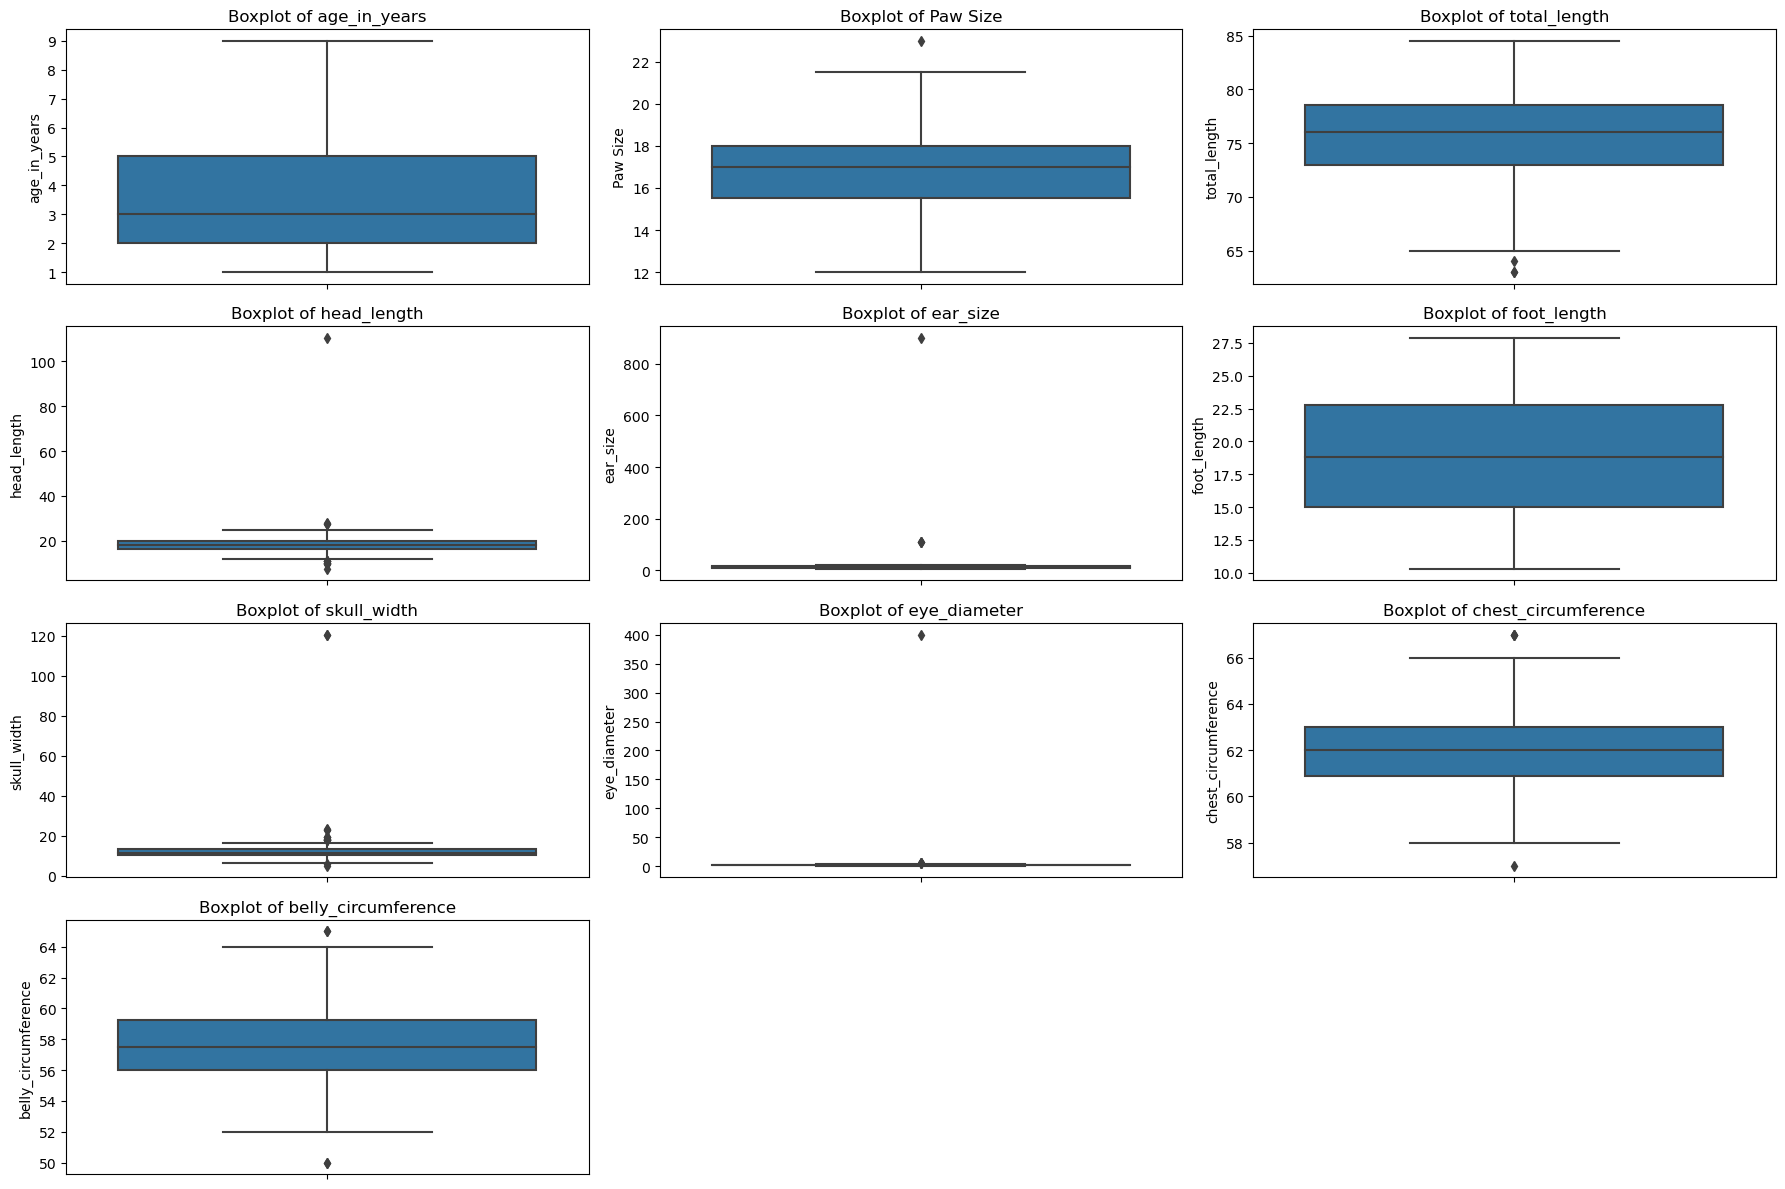

In [84]:
# Visualising Distributions and Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Full list of koala biometric variables
features = [
    'age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size',
    'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference'
]

# Create boxplots
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


## Step 6: Capping Outliers Using the IQR Method

Outliers are extreme values that lie significantly outside the typical range of the data. In our dataset, certain variables such as ear_size, head_length, skull_width, and others show unusually high or low measurements far beyond what is biologically reasonable for koalas.

While some variation is expected, extreme values like a skull width of 120 cm or an eye diameter of 400 mm likely stem from data entry errors or rare biological anomalies. If left unaddressed, these values can distort statistical results, especially in methods that rely on mean and standard deviation (like t-tests or regression).

To mitigate this, I applied the Interquartile Range (IQR) method to cap outliers. Here's how it works:

First, I calculated the lower and upper bounds (Q1 - 1.5×IQR and Q3 + 1.5×IQR).

Then, I capped any values beyond those limits to the respective boundary ensuring the shape of the distribution remains intact, without deleting data.

In [85]:

# Capping for ear_size 

# Step 1: Calculate IQR for ear_size
Q1 = df['ear_size'].quantile(0.25)
Q3 = df['ear_size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers = df[(df['ear_size'] < lower_bound) | (df['ear_size'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mear_size — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers[['koala_id', 'ear_size']])

# Step 4: Cap outliers
df.loc[df['ear_size'] < lower_bound, 'ear_size'] = round(lower_bound, 2)
df.loc[df['ear_size'] > upper_bound, 'ear_size'] = round(upper_bound, 2)

# Step 5: Show same koalas after capping
print(f"\n\033[1mear_size — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers['koala_id'])][['koala_id', 'ear_size']])



ear_size — Outliers before capping:
Lower bound: -1.25, Upper bound: 28.75
     koala_id  ear_size
57         58     110.4
89         90     900.8
146       147     110.4
163       164     110.4

ear_size — After capping:
     koala_id  ear_size
57         58     28.75
89         90     28.75
146       147     28.75
163       164     28.75


In [86]:
# Capping for head_length 

# Step 1: Calculate IQR for head_length
Q1 = df['head_length'].quantile(0.25)
Q3 = df['head_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers = df[(df['head_length'] < lower_bound) | (df['head_length'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mhead_length — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers[['koala_id', 'head_length']])

# Step 4: Cap outliers
df.loc[df['head_length'] < lower_bound, 'head_length'] = round(lower_bound, 2)
df.loc[df['head_length'] > upper_bound, 'head_length'] = round(upper_bound, 2)

# Step 5: Show same koalas after capping
print(f"\n\033[1mhead_length — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers['koala_id'])][['koala_id', 'head_length']])



head_length — Outliers before capping:
Lower bound: 11.05, Upper bound: 25.05
     koala_id  head_length
38         39          9.7
41         42         10.3
43         44         10.1
54         55         28.1
58         59         27.5
71         72         10.9
72         73          7.5
77         78        110.5
78         79         10.8
81         82         11.0
139       140          9.7
142       143         10.3
147       148         27.5
160       161         10.9

head_length — After capping:
     koala_id  head_length
38         39        11.05
41         42        11.05
43         44        11.05
54         55        25.05
58         59        25.05
71         72        11.05
72         73        11.05
77         78        25.05
78         79        11.05
81         82        11.05
139       140        11.05
142       143        11.05
147       148        25.05
160       161        11.05


In [87]:
# Capping for skull_width 

# Step 1: Calculate IQR for skull_width
Q1 = df['skull_width'].quantile(0.25)
Q3 = df['skull_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers = df[(df['skull_width'] < lower_bound) | (df['skull_width'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mskull_width — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers[['koala_id', 'skull_width']])

# Step 4: Cap outliers to two decimal places
df.loc[df['skull_width'] < lower_bound, 'skull_width'] = round(lower_bound, 2)
df.loc[df['skull_width'] > upper_bound, 'skull_width'] = round(upper_bound, 2)

# Step 5: Show after capping
print(f"\n\033[1mskull_width — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers['koala_id'])][['koala_id', 'skull_width']])




skull_width — Outliers before capping:
Lower bound: 6.45, Upper bound: 17.25
     koala_id  skull_width
14         15        120.6
16         17         22.7
47         48         18.2
53         54         18.0
54         55         18.2
57         58         19.2
58         59         17.8
77         78          6.0
78         79          5.0
97         98         23.6
115       116        120.6
117       118         22.7
146       147         19.2
147       148         17.8
163       164         19.2
164       165         17.8

skull_width — After capping:
     koala_id  skull_width
14         15        17.25
16         17        17.25
47         48        17.25
53         54        17.25
54         55        17.25
57         58        17.25
58         59        17.25
77         78         6.45
78         79         6.45
97         98        17.25
115       116        17.25
117       118        17.25
146       147        17.25
147       148        17.25
163       164        17.25
1

In [88]:
# Capping for eye_diameter 

# Step 1: Calculate IQR for eye_diameter
Q1 = df['eye_diameter'].quantile(0.25)
Q3 = df['eye_diameter'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers = df[(df['eye_diameter'] < lower_bound) | (df['eye_diameter'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1meye_diameter — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers[['koala_id', 'eye_diameter']])

# Step 4: Cap outliers to two decimal places
df.loc[df['eye_diameter'] < lower_bound, 'eye_diameter'] = round(lower_bound, 2)
df.loc[df['eye_diameter'] > upper_bound, 'eye_diameter'] = round(upper_bound, 2)

# Step 5: Show after capping
print(f"\n\033[1meye_diameter — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers['koala_id'])][['koala_id', 'eye_diameter']])



eye_diameter — Outliers before capping:
Lower bound: -0.25, Upper bound: 4.15
     koala_id  eye_diameter
50         51           4.4
53         54         400.5
67         68           4.4
75         76           4.8
156       157           4.4

eye_diameter — After capping:
     koala_id  eye_diameter
50         51          4.15
53         54          4.15
67         68          4.15
75         76          4.15
156       157          4.15


In [89]:
# Capping for Paw Size 

# Step 1: Calculate IQR for Paw Size
Q1 = df['Paw Size'].quantile(0.25)
Q3 = df['Paw Size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers_before = df[(df['Paw Size'] < lower_bound) | (df['Paw Size'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mPaw Size — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers_before[['koala_id', 'Paw Size']])

# Step 4: Cap outliers to two decimal places
df.loc[df['Paw Size'] < lower_bound, 'Paw Size'] = round(lower_bound, 2)
df.loc[df['Paw Size'] > upper_bound, 'Paw Size'] = round(upper_bound, 2)


# Step 5: Show after capping
print(f"\n\033[1mPaw Size — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers_before['koala_id'])][['koala_id', 'Paw Size']])



Paw Size — Outliers before capping:
Lower bound: 11.75, Upper bound: 21.75
    koala_id  Paw Size
53        54      23.0

Paw Size — After capping:
    koala_id  Paw Size
53        54     21.75


In [90]:
# Capping for total_length 

# Step 1: Calculate IQR for Paw Size
Q1 = df['total_length'].quantile(0.25)
Q3 = df['total_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers_before = df[(df['total_length'] < lower_bound) | (df['total_length'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mtotal_length — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers_before[['koala_id', 'total_length']])

# Step 4: Cap outliers to two decimal places
df.loc[df['total_length'] < lower_bound, 'total_length'] = round(lower_bound, 2)
df.loc[df['total_length'] > upper_bound, 'total_length'] = round(upper_bound, 2)

# Step 5: Show after capping
print(f"\n\033[1mtotal_length — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers_before['koala_id'])][['koala_id', 'total_length']])



total_length — Outliers before capping:
Lower bound: 64.75, Upper bound: 86.75
     koala_id  total_length
38         39          63.0
43         44          64.0
139       140          63.0

total_length — After capping:
     koala_id  total_length
38         39         64.75
43         44         64.75
139       140         64.75


In [91]:
# Capping for chest_circumference

# Step 1: Calculate IQR for chest_circumference
Q1 = df['chest_circumference'].quantile(0.25)
Q3 = df['chest_circumference'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers_before = df[(df['chest_circumference'] < lower_bound) | (df['chest_circumference'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mchest_circumference — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers_before[['koala_id', 'chest_circumference']])

# Step 4: Cap outliers to two decimal places
df.loc[df['chest_circumference'] < lower_bound, 'chest_circumference'] = round(lower_bound, 2)
df.loc[df['chest_circumference'] > upper_bound, 'chest_circumference'] = round(upper_bound, 2)

# Step 5: Show after capping
print(f"\n\033[1mchest_circumference — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers_before['koala_id'])][['koala_id', 'chest_circumference']])



chest_circumference — Outliers before capping:
Lower bound: 57.69, Upper bound: 66.19
     koala_id  chest_circumference
58         59                 67.0
78         79                 57.0
147       148                 67.0
164       165                 67.0

chest_circumference — After capping:
     koala_id  chest_circumference
58         59                66.19
78         79                57.69
147       148                66.19
164       165                66.19


In [92]:
# Capping for belly_circumference 

# Step 1: Calculate IQR for chest_circumference
Q1 = df['belly_circumference'].quantile(0.25)
Q3 = df['belly_circumference'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Identify outliers
outliers_before = df[(df['belly_circumference'] < lower_bound) | (df['belly_circumference'] > upper_bound)]

# Step 3: Show outliers before capping
print(f"\n\033[1mbelly_circumference — Outliers before capping:\033[0m")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(outliers_before[['koala_id', 'belly_circumference']])

# Step 4: Cap outliers to two decimal places
df.loc[df['belly_circumference'] < lower_bound, 'belly_circumference'] = round(lower_bound, 2)
df.loc[df['belly_circumference'] > upper_bound, 'belly_circumference'] = round(upper_bound, 2)

# Step 5: Show after capping
print(f"\n\033[1mbelly_circumference — After capping:\033[0m")
print(df[df['koala_id'].isin(outliers_before['koala_id'])][['koala_id', 'belly_circumference']])



belly_circumference — Outliers before capping:
Lower bound: 51.12, Upper bound: 64.12
     koala_id  belly_circumference
20         21                 65.0
38         39                 50.0
121       122                 65.0
139       140                 50.0

belly_circumference — After capping:
     koala_id  belly_circumference
20         21                64.12
38         39                51.12
121       122                64.12
139       140                51.12


## Step 7: Visualising Distributions of Numeric Features

To understand the distribution of each biometric variable, I plotted histograms with overlaid KDE curves and calculated the skewness for each. Most features are relatively symmetric, but a few (e.g. ear_size and eye_diameter) display mild positive or negative skew. These insights are important for deciding how to handle missing values in the next step.

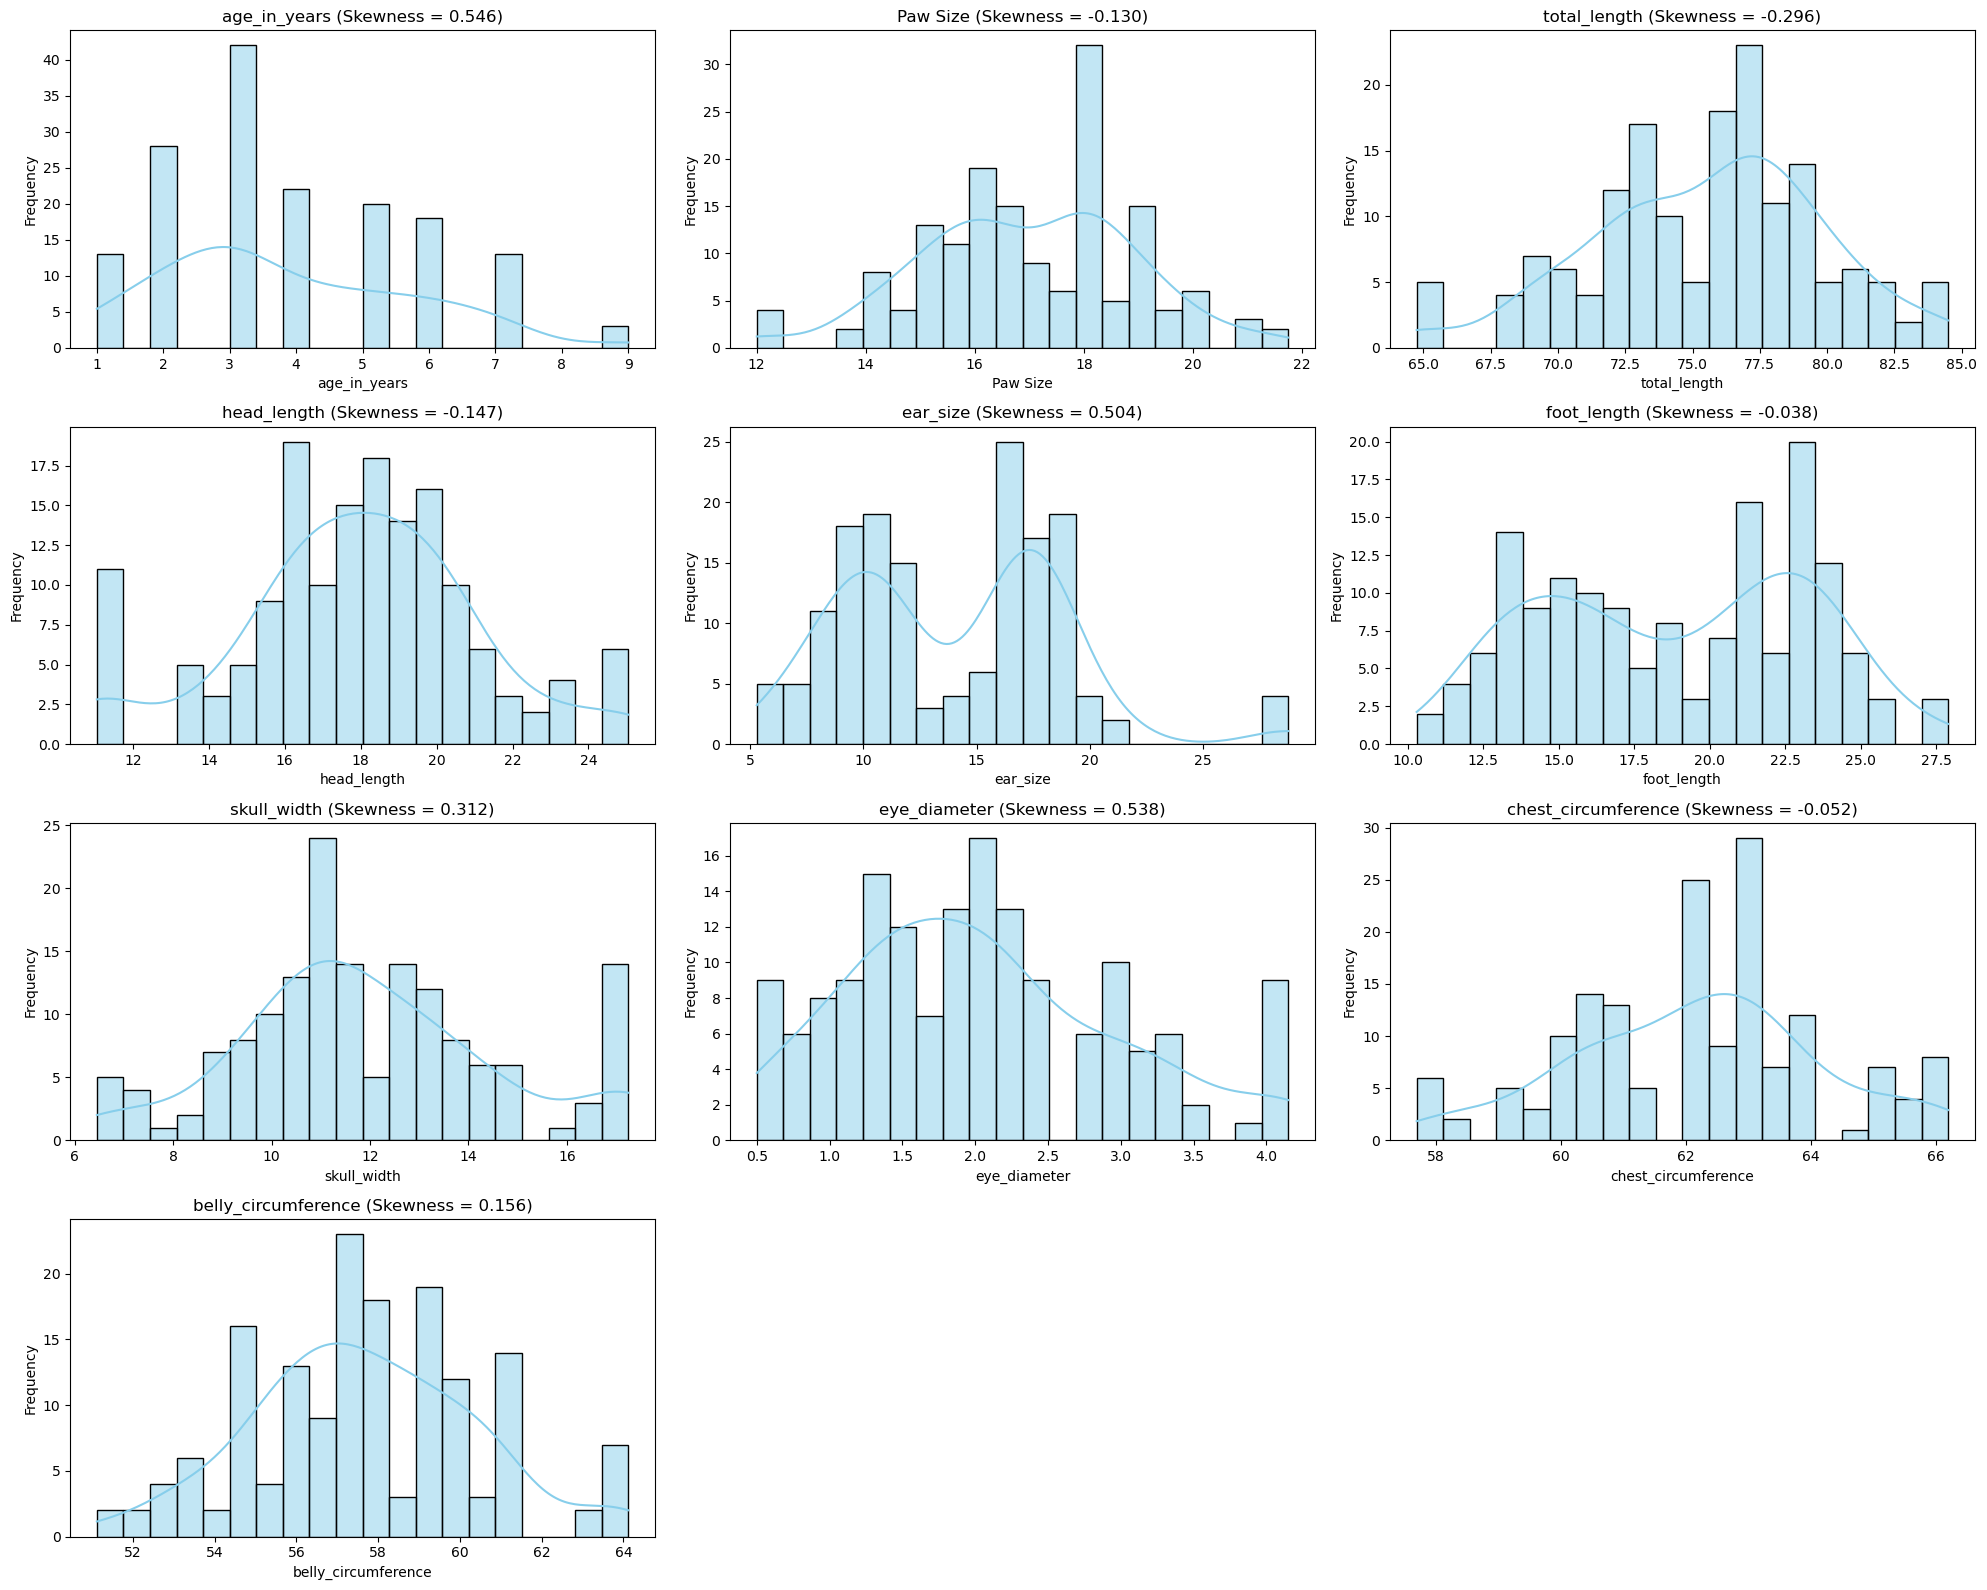

In [18]:
# Step 7: Visualize Distribution

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numeric biometric features
numeric_features = [
    'age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size',
    'foot_length', 'skull_width', 'eye_diameter', 'chest_circumference', 'belly_circumference'
]

plt.figure(figsize=(20, 16))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue', edgecolor='black')
    skewness = df[feature].skew()
    plt.title(f"{feature} (Skewness = {skewness:.3f})")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## Step 8: Skewness-Based Missing Value Imputation

Before filling in the missing values, I reviewed the skewness of each numeric column. If a feature was significantly skewed (absolute skewness > 0.4), I used the median for imputation, since it's less sensitive to outliers. Otherwise, I used the mean, which works well for approximately symmetric data.

In [19]:
# Check Skewness
print("Skewness of each column:")
for feature in numeric_features:
    skew = df[feature].skew()
    if abs(skew) >= 0.4:
        method = "median"
    else:
        method = "mean"
    print(f"{feature}: Skewness = {skew:.3f} → fill by {method}")

Skewness of each column:
age_in_years: Skewness = 0.546 → fill by median
Paw Size: Skewness = -0.130 → fill by mean
total_length: Skewness = -0.296 → fill by mean
head_length: Skewness = -0.147 → fill by mean
ear_size: Skewness = 0.504 → fill by median
foot_length: Skewness = -0.038 → fill by mean
skull_width: Skewness = 0.312 → fill by mean
eye_diameter: Skewness = 0.538 → fill by median
chest_circumference: Skewness = -0.052 → fill by mean
belly_circumference: Skewness = 0.156 → fill by mean


## Step 9: Imputing Missing Values Accordingly

I applied different imputation strategies depending on the shape of the distribution:

- Features with skewed distributions (like ear_size) were filled using the median to prevent distortion.

- Features that were roughly normal (like head_length and total_length) were filled using the mean.

This approach ensures we preserve the natural shape of each feature's distribution while handling missing data responsibly.


In [95]:
# Fill with median (for skewed distributions)
df['age_in_years'].fillna(df['age_in_years'].median(), inplace=True)
df['ear_size'].fillna(df['ear_size'].median(), inplace=True)
df['eye_diameter'].fillna(df['eye_diameter'].median(), inplace=True)

# Fill with mean (for approximately symmetric distributions)
df['Paw Size'].fillna(df['Paw Size'].mean(), inplace=True)
df['total_length'].fillna(df['total_length'].mean(), inplace=True)
df['head_length'].fillna(df['head_length'].mean(), inplace=True)
df['foot_length'].fillna(df['foot_length'].mean(), inplace=True)
df['skull_width'].fillna(df['skull_width'].mean(), inplace=True)
df['chest_circumference'].fillna(df['chest_circumference'].mean(), inplace=True)
df['belly_circumference'].fillna(df['belly_circumference'].mean(), inplace=True)

# Confirm no missing values remain in numeric features
print("Remaining missing values in numeric columns after imputation:")
numeric_cols = [
    'age_in_years', 'Paw Size', 'total_length', 'head_length', 'ear_size',
    'foot_length', 'skull_width', 'eye_diameter',
    'chest_circumference', 'belly_circumference'
]
print(df[numeric_cols].isnull().sum())


Remaining missing values in numeric columns after imputation:
age_in_years           0
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            0
skull_width            0
eye_diameter           0
chest_circumference    0
belly_circumference    0
dtype: int64


## Step 10: Exploring Categorical Distributions

I explored the distribution of key categorical variables to better understand the structure of the dataset. The gender column shows a fairly balanced mix of male and female koalas, which provides a solid foundation for conducting gender based comparisons. Similarly, the habitat variable is evenly split between VIC and QLD, enabling meaningful habitat-level analysis. However, the region column is more unevenly distributed, with certain areas having significantly more samples than others. This imbalance suggests that any region-specific findings should be interpreted with caution, as they may be influenced by unequal sampling across locations.

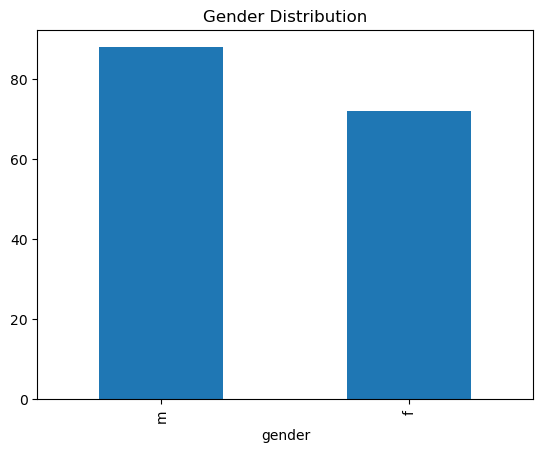

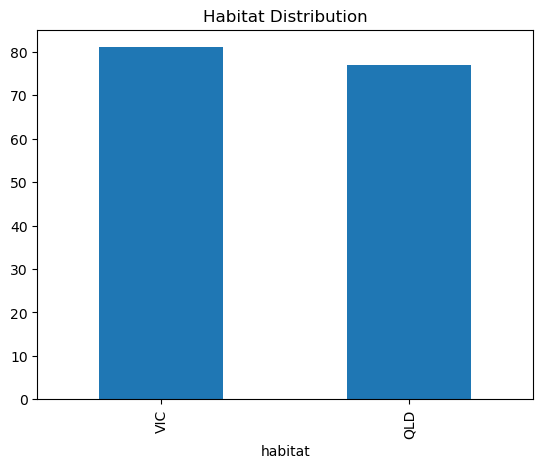

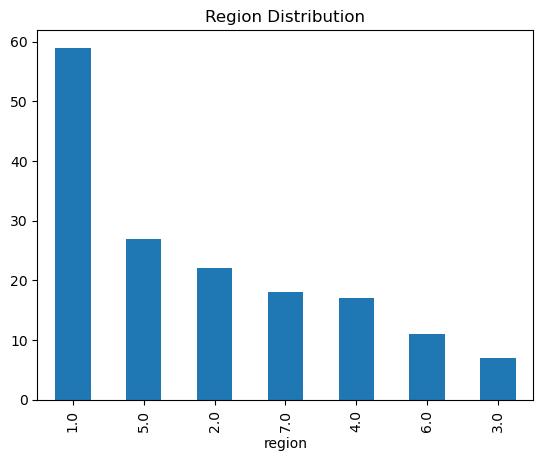

In [21]:
# Step 9: Check Distribution of category

# Gender distribution: Check if the dataset has a balanced number of male and female koalas
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

# Habitat distribution: See how many koalas come from each state (VIC vs QLD)
df['habitat'].value_counts().plot(kind='bar', title='Habitat Distribution')
plt.show()

# Region distribution: Visualise how koalas are spread across 7 different regions
df['region'].value_counts().plot(kind='bar', title='Region Distribution')
plt.show()

 ## Step 11: Correlation Heatmap (Pearson Coefficients)
 
 I generated a heatmap to examine the relationships between numerical features using Pearson correlation

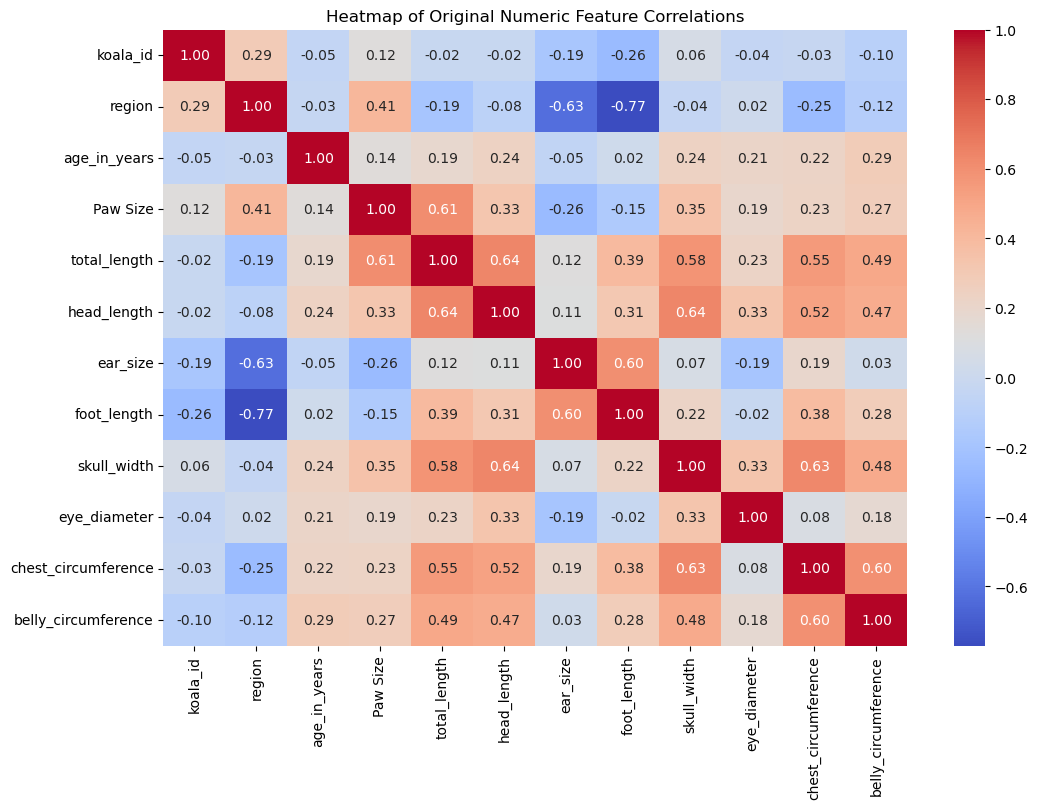

In [22]:
# Step 10: Check Coefficient
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_columns = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Original Numeric Feature Correlations")
plt.show()


### Several strong positive correlations emerged:

- head_length is highly correlated with total_length (0.64) and chest_circumference (0.52), indicating possible body-size scaling.

- skull_width correlates with both chest_circumference (0.63) and belly_circumference (0.60), suggesting these features may vary together as part of overall body structure.

- foot_length shows moderate correlation with many body size indicators.

These insights will help guide feature selection and interpretation in later inferential tests.

## Step 12: Summary Statistics

I used .describe() to get a quick overview of the numeric features. This helps me check if the values are within a reasonable range, spot any unusual patterns, and understand how each variable is spread. It's a simple but important step to make sure the data looks clean before doing any deeper analysis.

In [98]:
df.describe()

,koala_id,region,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,162.000000,161.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,85.623457,3.223602,3.814815,16.947785,75.574528,17.914103,14.005556,18.878571,11.946497,2.028086,62.173500,57.660252
std,49.307379,2.182244,1.852385,1.922621,4.241817,3.079217,4.717336,4.264966,2.593363,0.910343,1.952349,2.696299
min,1.000000,1.000000,1.000000,12.000000,64.750000,11.050000,5.300000,10.300000,6.450000,0.500000,57.690000,51.120000
25%,43.250000,1.000000,2.250000,15.500000,73.000000,16.300000,10.100000,15.400000,10.525000,1.400000,61.000000,56.000000
50%,86.500000,2.000000,3.000000,17.000000,76.000000,17.914103,14.500000,18.878571,11.500000,1.900000,62.000000,57.580126
75%,128.750000,5.000000,5.000000,18.000000,78.500000,19.800000,17.400000,22.800000,13.100000,2.500000,63.000000,59.000000
max,169.000000,7.000000,9.000000,21.750000,84.500000,25.050000,28.750000,27.900000,17.250000,4.150000,66.190000,64.120000


# Answer to Section 3: Data visualisation (2 Marks)

## Visualisation 1: Skull Width Comparison by Gender

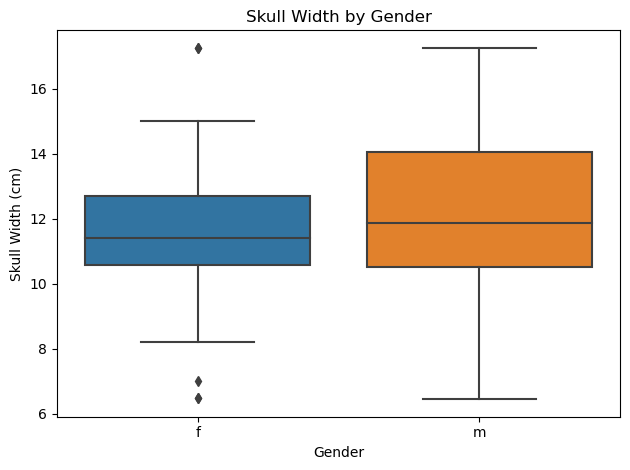

In [99]:
# Visualisation
sns.boxplot(data=df, x='gender', y='skull_width')
plt.title('Skull Width by Gender')
plt.xlabel('Gender')
plt.ylabel('Skull Width (cm)')
plt.tight_layout()
plt.show()


In this visualization, I use a boxplot to compare the skull width of male and female koalas. Skull width is a key anatomical trait that may reflect biological differences between sexes, particularly in terms of body size and physical robustness. Gender serves as a natural grouping variable for this kind of biological comparison.

I selected skull_width and gender to explore whether any noticeable differences in cranial dimensions exist between male and female koalas. Understanding such patterns can offer insight into sexual dimorphism, which is relevant for ecological research, species classification, and veterinary care.

The boxplot reveals that male koalas generally have a wider skull than females. Males show a slightly higher median and a broader range, indicating greater variability within that group. While there is some overlap between the two distributions, the visual suggests that gender may have a moderate influence on skull width.

## Visualisation 2: Belly Circumference by Habitat

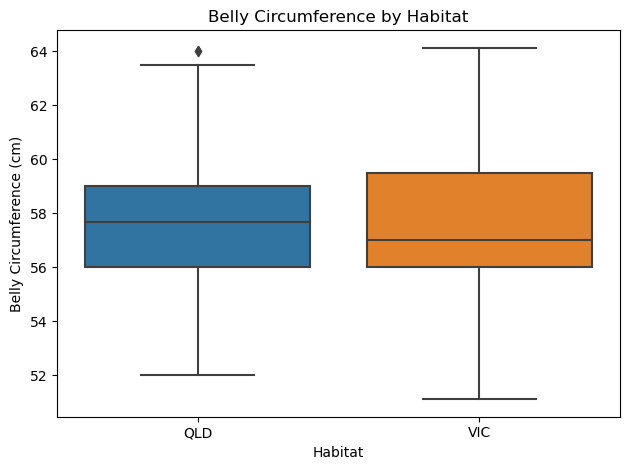

In [25]:
# Compare belly circumference across habitats to explore physical variation
sns.boxplot(data=df, x='habitat', y='belly_circumference')
plt.title('Belly Circumference by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Belly Circumference (cm)')
plt.tight_layout()
plt.show()


In this boxplot, I compare the belly circumference of koalas from two major habitats: Queensland (QLD) and Victoria (VIC). This comparison was designed to explore whether environmental or geographic differences such as variations in climate, food availability, or eucalyptus species might influence koalas' physical characteristics.

Belly circumference is a meaningful indicator of overall body mass or fat storage and can reflect the koalas’ nutritional status or adaptation to local conditions. Meanwhile, habitat serves as a key grouping variable, potentially capturing ecological pressures unique to each region.

The plot shows that while the median belly circumferences are similar between the two habitats, VIC koalas display slightly greater variability and a higher maximum value. This suggests that although overall differences are modest, there may be subtle regional influences worth investigating further.

This visualization provides an initial indication that habitat could play a role in shaping body size, but further statistical testing would be necessary to confirm whether the observed differences are significant.

# Answer to Section 4: Analysis (6 Marks)

## Is the mean head length of the Koalas significantly different from 65.0 mm? (all the codes in one cell) 

In [102]:
from scipy import stats
import numpy as np

# One-sample t-test to compare mean head length with 65.0 mm 

# Step 1: Define the target value and extract the data
target_mean = 65.0
head_lengths = df['head_length']

# Step 2: Perform the one-sample t-test
t_stat, p_value = stats.ttest_1samp(head_lengths, popmean=target_mean)

# Step 3: Print test results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The mean head length is significantly different from 65.0 mm.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 65.0 mm.")


T-statistic: -194.6292
P-value: 0.0000
Reject the null hypothesis: The mean head length is significantly different from 65.0 mm.


### Interpretation of the One-Sample T-Test Result
To test whether the mean head length of koalas is significantly different from 65.0 mm, I performed a one-sample t-test.

The results show:

- T-statistic: -194.6292

- P-value: 0.0000

Since the p-value is well below 0.05, I rejected the null hypothesis. This means there is strong statistical evidence that the mean head length of koalas is not equal to 65.0 mm. The large negative t-value also suggests that the actual mean is substantially lower than the target value.

## Do male and female Koalas have significantly different mean head lengths? (all the codes in one cell) 

In [103]:
from scipy import stats
import numpy as np

# Independent two-sample t-test for gender and head_length

# Step 1: Split the head_length data by gender
male_heads = df[df['gender'] == 'm']['head_length']
female_heads = df[df['gender'] == 'f']['head_length']

# Step 2: Perform the independent t-test (Welch’s t-test by default)
t_stat, p_value = stats.ttest_ind(male_heads, female_heads, equal_var=False)

# Step 3: Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Male and female koalas have significantly different head lengths.")
else:
    print("Fail to reject the null hypothesis: No significant difference in head length between genders.")


T-statistic: 2.3994
P-value: 0.0176
Reject the null hypothesis: Male and female koalas have significantly different head lengths.


### Interpretation of the Independent Samples T-Test (Male vs Female Head Length)

To investigate whether male and female koalas have significantly different mean head lengths, I conducted an independent two-sample t-test.

The result shows:

- T-statistic: 2.3994

- P-value: 0.0176

Since the p-value is below 0.05, I rejected the null hypothesis, which suggests that there is a statistically significant difference in mean head length between male and female koalas. This supports the idea that gender may influence cranial size, possibly due to biological or anatomical differences.

## Is there a significant difference in the paw size between male and female koalas? (all the codes in one cell) 

In [104]:
from scipy import stats
import numpy as np

# T-test for paw size between male and female koalas 

# Step 1: Separate the paw size data by gender
male_paws = df[df['gender'] == 'm']['Paw Size']
female_paws = df[df['gender'] == 'f']['Paw Size']

# Step 2: Perform Welch's t-test
t_stat, p_value = stats.ttest_ind(male_paws, female_paws, equal_var=False)

# Step 3: Show test results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Male and female koalas have significantly different paw sizes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in paw size between genders.")


T-statistic: -1.0841
P-value: 0.2800
Fail to reject the null hypothesis: No significant difference in paw size between genders.


### Interpretation of the Independent Samples T-Test (Paw Size by Gender)
To check whether there’s a significant difference in paw size between male and female koalas, I conducted an independent two-sample t-test.

The results shows:
- T-statistic: -1.0841
- value: 0.2800

Since the p-value is greater than 0.05, I failed to reject the null hypothesis. This suggests that there is no statistically significant difference in mean paw size between male and female koalas. In other words, gender does not appear to play a major role in determining paw size in this dataset.



## Do koalas from different habitats have significantly different total body lengths? (all the codes in one cell) 

In [105]:
from scipy import stats
import numpy as np

# T-test for total body length between VIC and QLD koalas 

# Step 1: Subset by habitat
vic_lengths = df[df['habitat'] == 'VIC']['total_length']
qld_lengths = df[df['habitat'] == 'QLD']['total_length']

# Step 2: Perform Welch’s t-test
t_stat, p_value = stats.ttest_ind(vic_lengths, qld_lengths, equal_var=False)

# Step 3: Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis: Koalas from different habitats have significantly different body lengths.")
else:
    print("Fail to reject the null hypothesis: No significant difference in body length between habitats.")


T-statistic: -0.0595
P-value: 0.9526
Fail to reject the null hypothesis: No significant difference in body length between habitats.


### Interpretation of the Independent Samples T-Test (Body Length by Habitat)
To examine whether koalas from different habitats (VIC and QLD) have significantly different total body lengths, I ran an independent two-sample t-test.

The test results were:

- T-statistic: -0.0595

- P-value: 0.9526

Since the p-value is much greater than 0.05, I failed to reject the null hypothesis. This means there is no significant difference in average body length between koalas living in VIC and those in QLD. So, based on this data, habitat doesn't appear to have a measurable effect on body length.



## Can we predict the total length of a Koala based on its head length? (all the codes in one cell) 

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     109.5
Date:                Sat, 17 May 2025   Prob (F-statistic):           7.61e-20
Time:                        15:14:25   Log-Likelihood:                -421.23
No. Observations:                 162   AIC:                             846.5
Df Residuals:                     160   BIC:                             852.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.8461      1.525     39.237      

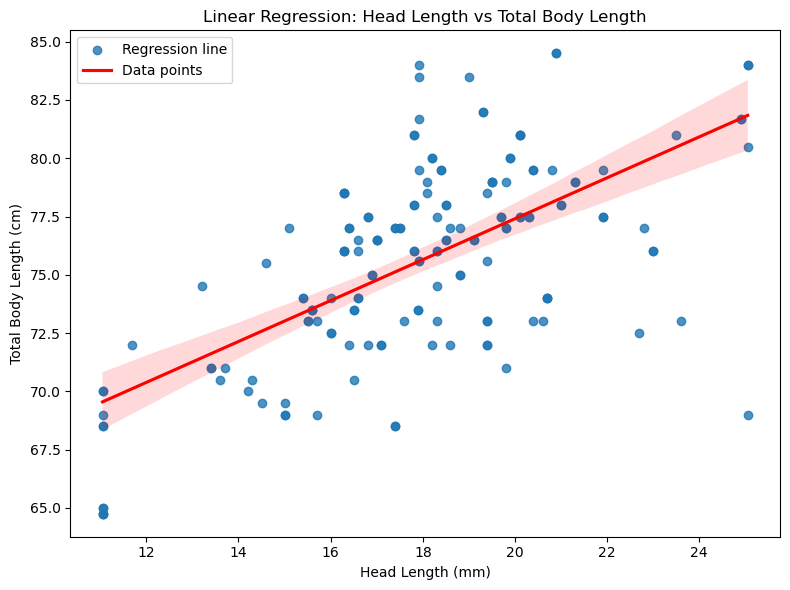


 Final Interpretation:
- Head length is a statistically significant predictor of total body length (p < 0.001).
- The model explains about 40.6% of the variation in body length.
- Each 1 mm increase in head length is associated with a 0.88 cm increase in predicted body length.
- The intercept of 59.85 cm represents expected body length when head length is zero.


In [106]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Predict total_length using head_length via linear regression 

# Step 1: Define variables
X = df['head_length']
y = df['total_length']

# Step 2: Add constant to X for intercept
X_const = sm.add_constant(X)

# Step 3: Fit linear regression model
model = sm.OLS(y, X_const).fit()

# Step 4: Summary output
print(model.summary())

# Step 5: Plot regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='head_length', y='total_length', data=df, line_kws={"color": "red"})
plt.title("Linear Regression: Head Length vs Total Body Length")
plt.xlabel("Head Length (mm)")
plt.ylabel("Total Body Length (cm)")
plt.legend(["Regression line", "Data points"])
plt.tight_layout()
plt.show()

# Step 6: Final interpretation
p_value = model.pvalues['head_length']
r_squared = model.rsquared
coef = model.params['head_length']
intercept = model.params['const']

print("\n Final Interpretation:")
if p_value < 0.001:
    print(f"- Head length is a statistically significant predictor of total body length (p < 0.001).")
    print(f"- The model explains about {r_squared * 100:.1f}% of the variation in body length.")
    print(f"- Each 1 mm increase in head length is associated with a {coef:.2f} cm increase in predicted body length.")
    print(f"- The intercept of {intercept:.2f} cm represents expected body length when head length is zero.")
else:
    print(f"- Head length is not a significant predictor of total body length (p = {p_value:.3f}).")

### Predicting Koala Body Length from Head Length: A Simple Linear Regression Analysis

I ran a simple linear regression to test whether head length can predict total body length in koalas. The analysis showed a statistically significant result (p < 0.001), meaning head length has a real impact on body length. The model’s R-squared value is 0.406, indicating that head length explains about 40.6% of the variation in total body length. The coefficient of 0.88 means that each 1 mm increase in head length is associated with an increase of 0.88 cm in predicted body length. Visually, the regression line fits the data well, showing a clear positive trend. While head length alone doesn’t explain everything, it is a meaningful and useful predictor.

In summary, yes head length can be used to predict total body length in koalas, and the relationship is both statistically and practically significant.

## Can we predict the total length of a Koala based on its paw size? (all the codes in one cell) 

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     93.83
Date:                Sat, 17 May 2025   Prob (F-statistic):           9.49e-18
Time:                        15:14:42   Log-Likelihood:                -426.07
No. Observations:                 162   AIC:                             856.1
Df Residuals:                     160   BIC:                             862.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8409      2.362     22.372      0.0

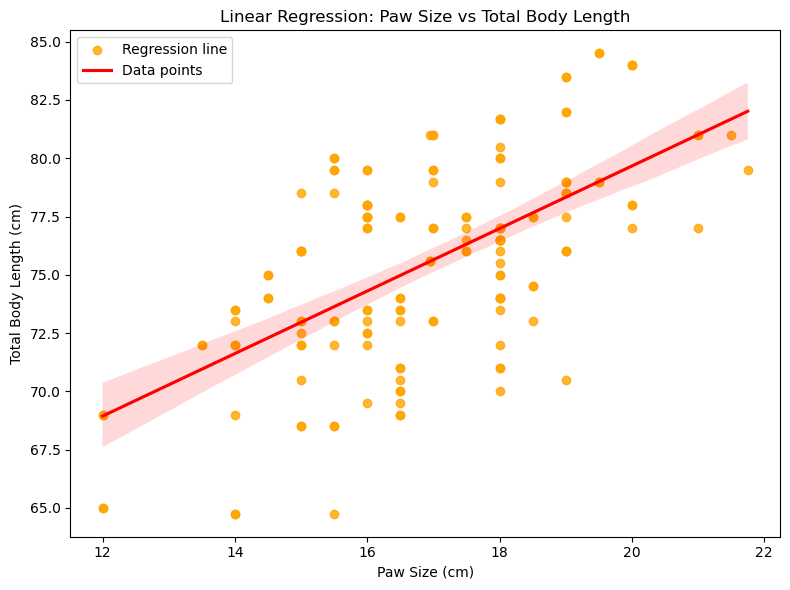


 Final Interpretation:
- Paw size is a statistically significant predictor of total body length (p < 0.001).
- The model explains about 37.0% of the variation in body length.
- Each 1 cm increase in paw size is associated with a 1.34 cm increase in predicted body length.
- The intercept of 52.84 cm represents expected body length when paw size is zero.


In [107]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression: total_length vs paw_size 

# Step 1: Define X and y
X = df['Paw Size']
y = df['total_length']

# Step 2: Add constant to X
X_const = sm.add_constant(X)

# Step 3: Fit regression model
model = sm.OLS(y, X_const).fit()

# Step 4: Show regression summary
print(model.summary())

# Step 5: Plot regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Paw Size', y='total_length', data=df, line_kws={"color": "red"}, scatter_kws={"color": "orange"})
plt.title("Linear Regression: Paw Size vs Total Body Length")
plt.xlabel("Paw Size (cm)")
plt.ylabel("Total Body Length (cm)")
plt.legend(["Regression line", "Data points"])
plt.tight_layout()
plt.show()

# Step 6: Final interpretation
p_value = model.pvalues['Paw Size']
r_squared = model.rsquared
coef = model.params['Paw Size']
intercept = model.params['const']


print("\n Final Interpretation:")
if p_value < 0.05:
    print(f"- Paw size is a statistically significant predictor of total body length (p < 0.001).")
    print(f"- The model explains about {r_squared * 100:.1f}% of the variation in body length.")
    print(f"- Each 1 cm increase in paw size is associated with a {coef:.2f} cm increase in predicted body length.")
    print(f"- The intercept of {intercept:.2f} cm represents expected body length when paw size is zero.")
else:
    print(f"- Paw size is not a significant predictor of total body length (p = {p_value:.3f}).")


### Predicting Koala Body Length from Paw Size: A Simple Linear Regression Analysis

To examine whether paw size can predict the total body length of a koala, I performed a simple linear regression using Paw Size as the predictor and total_length as the response variable. The results show that paw size is a statistically significant predictor of total body length, with a p-value less than 0.001. The model’s R-squared value is 0.370, meaning that paw size explains about 37.0% of the variation in total body length. This indicates a reasonably strong relationship for a single predictor. The regression coefficient is 1.34, suggesting that for every 1 cm increase in paw size, a koala’s total body length is expected to increase by approximately 1.34 cm. The intercept of 52.84 cm represents the estimated body length when paw size is zero—used only for modeling purposes.The scatterplot with the fitted regression line shows a clear positive trend, reinforcing the relationship observed in the statistical output.

In conclusion, yes paw size can be used to predict total body length in koalas, and the relationship is both statistically significant and practically meaningful.

